In [18]:
import pandas as pd
import glob

years = [2017,2018,2019,2020]
files = glob.glob('refined-data/*.csv')
data = {}

for year, file in zip(years, files):
    data[year] = pd.read_csv(file)

In [19]:
# universal_column_names = ['SR','DISTRICT','TALUKA','LOCATION','PH','EC','TDS','TH','CA','MG','NA','K','CO3','HCO3','CL','NO3','SO4','F','ALK','FE','SAR']

In [20]:
for i,df in enumerate(data.values()):
    print(f'Dataframe number {i}: ', df.columns.to_list())

Dataframe number 0:  ['S.No', 'District', 'Taluka', 'Location', 'pH', 'EC', 'TDS', 'TH', 'Ca', 'Mg', 'Na', 'K', 'CO3', 'HCO3', 'Cl', 'NO3', 'SO4', 'F', 'Alk', 'Fe']
Dataframe number 1:  ['District', 'Location', 'pH', 'EC', 'TDS', 'CO3', 'HCO3', 'Cl', 'NO3', 'S04', 'F', 'Alkalinity', 'Ca', 'Mg', 'TH', 'Na', 'K', 'SAR']
Dataframe number 2:  ['Well No.', 'District', 'Taluka', 'Location', 'Date', 'pH', 'EC', 'TDS', 'CO3', 'HCO3', 'Cl', 'NO3', 'SO4', 'F', 'Alk', 'Ca', 'Mg', 'TH', 'Na', 'K', 'SAR']
Dataframe number 3:  ['Sl.', 'District', 'Site', 'pH', 'EC', 'TDS', 'CO3', 'HCO3', 'Cl', 'NO3', 'SO4', 'F', ' Alk', 'Ca', 'Mg', 'TH', 'Na', 'K', 'SAR']


In [21]:
column_name_map = {
    'S.No':'ID',
    'Sl.':'ID',
    'District':'DISTRICT',
    'Taluka':'TALUKA',
    'Location':'LOCATION',
    'Alkalinity':'ALK',
    ' Alk':'ALK',
    'Alk':'ALK',
    'S04':'SO4',
    'Date':'DATE',
    'Well No.':'WELL NO.',
    'Site':'SITE',
    'pH':'PH',
    'Mg':'MG',
    'Ca':'CA',
    'Na':'NA',
    'Fe':'FE',
    'Cl':'CL',
}

for df in data.values():
    df.rename(columns=column_name_map, inplace=True)

In [22]:
for i,df in enumerate(data.values()):
    print(f'Dataframe number {i}: ', df.columns.to_list())

Dataframe number 0:  ['ID', 'DISTRICT', 'TALUKA', 'LOCATION', 'PH', 'EC', 'TDS', 'TH', 'CA', 'MG', 'NA', 'K', 'CO3', 'HCO3', 'CL', 'NO3', 'SO4', 'F', 'ALK', 'FE']
Dataframe number 1:  ['DISTRICT', 'LOCATION', 'PH', 'EC', 'TDS', 'CO3', 'HCO3', 'CL', 'NO3', 'SO4', 'F', 'ALK', 'CA', 'MG', 'TH', 'NA', 'K', 'SAR']
Dataframe number 2:  ['WELL NO.', 'DISTRICT', 'TALUKA', 'LOCATION', 'DATE', 'PH', 'EC', 'TDS', 'CO3', 'HCO3', 'CL', 'NO3', 'SO4', 'F', 'ALK', 'CA', 'MG', 'TH', 'NA', 'K', 'SAR']
Dataframe number 3:  ['ID', 'DISTRICT', 'SITE', 'PH', 'EC', 'TDS', 'CO3', 'HCO3', 'CL', 'NO3', 'SO4', 'F', 'ALK', 'CA', 'MG', 'TH', 'NA', 'K', 'SAR']


In [24]:
universal_column_names = list(set(data[2017].columns.to_list() + data[2018].columns.to_list() + data[2019].columns.to_list() + data[2020].columns.to_list()))
universal_column_names = sorted(universal_column_names, key=lambda x: -len(x))
universal_column_names

['WELL NO.',
 'LOCATION',
 'DISTRICT',
 'TALUKA',
 'SITE',
 'HCO3',
 'DATE',
 'ALK',
 'TDS',
 'SO4',
 'SAR',
 'NO3',
 'CO3',
 'EC',
 'ID',
 'NA',
 'TH',
 'FE',
 'CA',
 'MG',
 'CL',
 'PH',
 'K',
 'F']

In [25]:
super_data = pd.DataFrame()
data_ls = []
for year, df in data.items():
    data = pd.DataFrame()
    data['YEAR'] = [year]*len(df)
    for col in universal_column_names:
        try:
            data[col] = df[col]
        except KeyError:
            data[col] = [None]*len(df)
    data.drop(['ID'], axis=1)
    data_ls.append(data)

super_data = pd.concat(data_ls, ignore_index=True, axis=0).reset_index(drop=True)
super_data

/var/folders/40/kymyqbk50x1fj7l3yzkv0hmm0000gp/T/ipykernel_32267/1360134645.py:14: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  super_data = pd.concat(data_ls, ignore_index=True, axis=0).reset_index(drop=True)


,YEAR,WELL NO.,LOCATION,DISTRICT,TALUKA,SITE,HCO3,DATE,ALK,TDS,...,ID,NA,TH,FE,CA,MG,CL,PH,K,F
0,2017,None,Barvala,Ahmedabad,BARWALA,None,891.0,None,730.0,3410.00,...,1.0,937.0,450.0,0.033,80.0,60.0,959.0,8.25,0.3,2.80
1,2017,None,Dhandhuka1,Ahmedabad,DHANDHUKA,None,1013.0,None,830.0,9521.00,...,2.0,3220.0,1300.0,0.641,180.0,207.0,3373.0,8.23,9.9,6.64
2,2017,None,Endla,Ahmedabad,VIRAMGAM,None,305.0,None,250.0,459.00,...,3.0,49.0,220.0,0,52.0,22.0,50.0,8.17,13.6,0.44
3,2017,None,Kumarkhan,Ahmedabad,VIRAMGAM,None,988.0,None,810.0,7142.00,...,4.0,1875.0,800.0,0.082,140.0,109.0,2485.0,8.19,7.2,11.20
4,2017,None,Kundali,Ahmedabad,RANPUR,None,305.0,None,250.0,871.00,...,5.0,210.0,280.0,0,64.0,29.0,85.0,8.03,3.7,0.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2224,2020,None,None,Valsad,None,Bhilad,171.0,None,140.0,238.52,...,597.0,16.0,160.0,None,40.0,15.0,28.0,6.99,1.36,0.15
2225,2020,None,None,Valsad,None,Tumb,281.0,None,230.0,447.56,...,598.0,45.0,240.0,None,56.0,24.0,71.0,7.97,8.1,0.22
2226,2020,None,None,Valsad,None,Umargaon,281.0,None,230.0,429.47,...,599.0,59.0,230.0,None,56.0,22.0,57.0,8.03,0.54,0.34
2227,2020,None,None,Valsad,None,Kanadu,366.0,None,300.0,631.81,...,600.0,57.0,400.0,None,80.0,49.0,114.0,7.63,0.24,0.28


<Axes: >

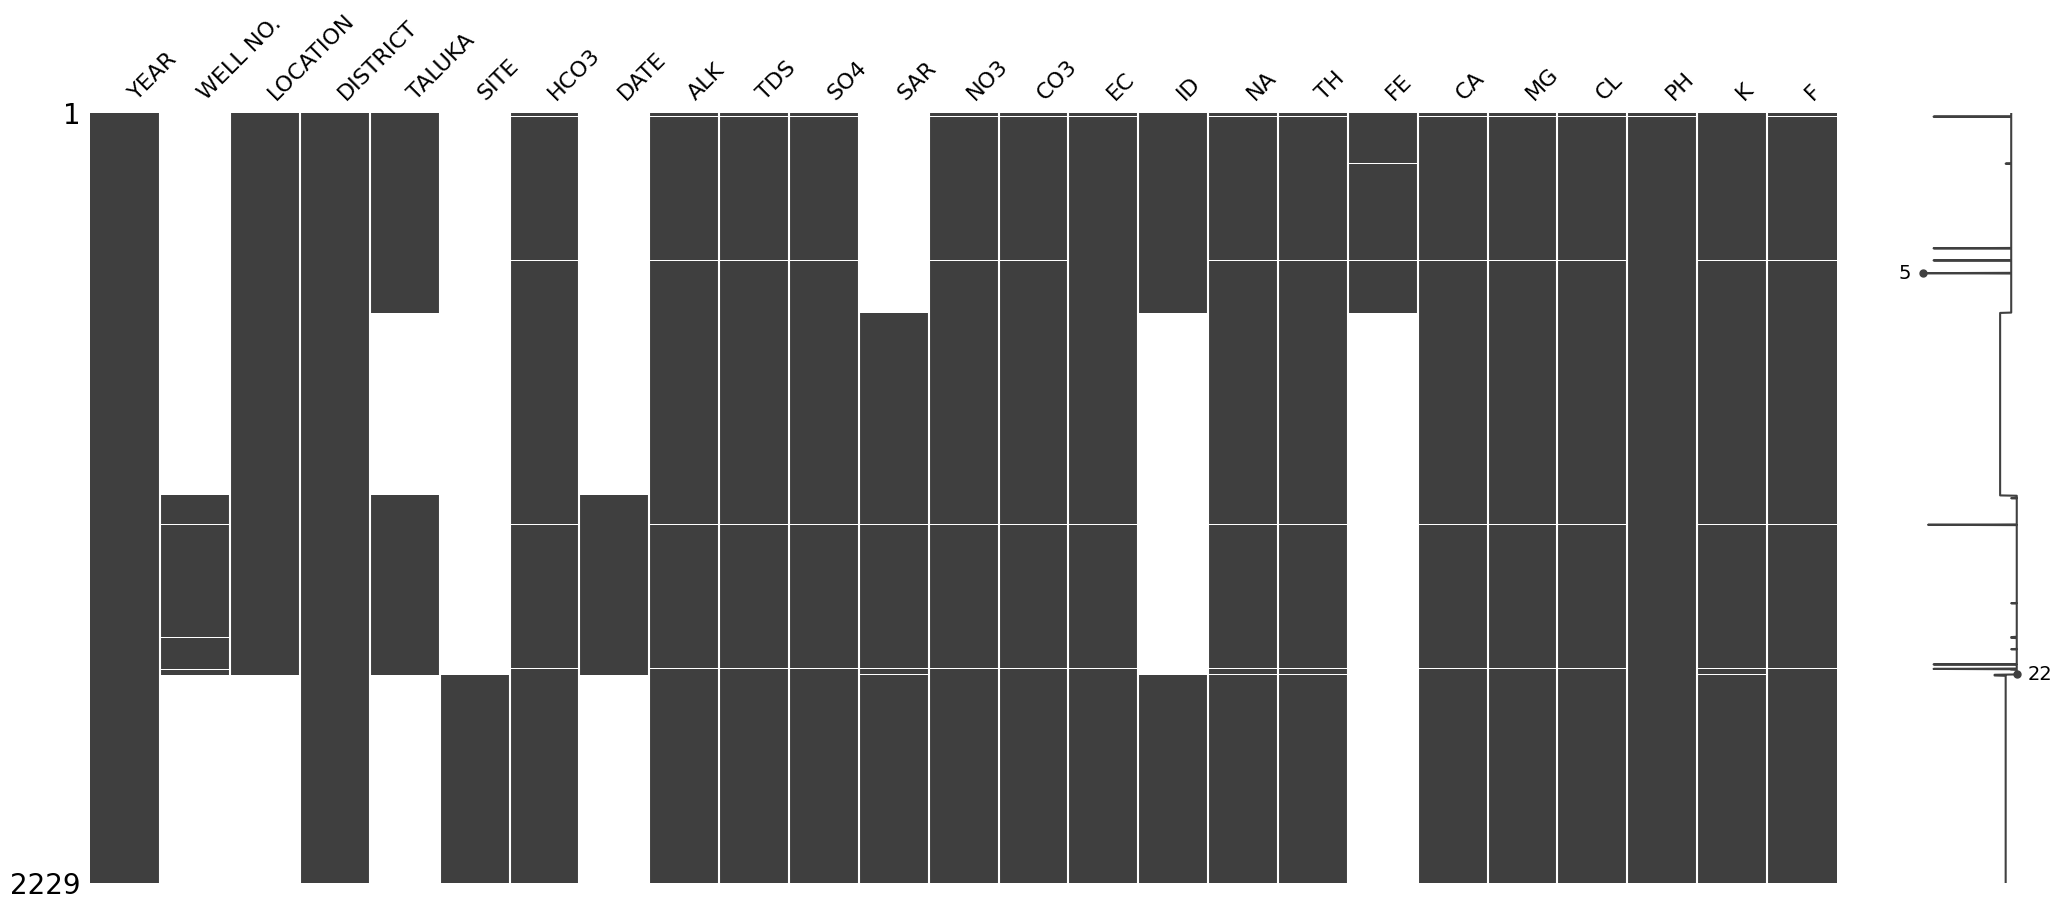

In [26]:
import missingno as mno

mno.matrix(super_data)

In [27]:
super_data.to_csv('refined-data/super_data.csv', index=False)